Eigentliche gute Vorhersage.
Jetzt mehr backcandles ausprobieren, hyperparamter anapassen. inputs wo 150 ist. möglichkeit weitere indikatoren oder wie auch immer.

PROBLEM: Warum das Modell einen Denkfehler hat: Das Modell lernt, dass der aktuelle closingprice nicht all zu weit vom nächsten closingpreis entfernt seien wird. Jeder vorhergesagte Wert der nah am Closingpreis des vorherigen Tages ist, sieht aus als sei er genau.
Es sieht gut aus aber man kann erkennen, dass vorhersage nur 1 Tag verzögerter tatsächlicher Wert ist.
Modell versucht Closing Preis des nächsten Tages vorherzusagen anhand vergangener Daten. Das wird für jeden Tag getestet und soll zukpünftige Werte vorherzusagen

Neuer Ansatz. Target ist der Unterschied zwischen Close der aktuellen Kerze zur nächsten Close Kerze. Es wird nun statt dem Closepreis des nächsten Tages vorherzusagen, versucht um wie viel der preis hoch oder runter geht. Wo ist der Unterschied? Nächster candle Price vs Preisbewegung.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_ta as ta
import seaborn as sns
import matplotlib.dates as mdates

In [3]:
#.\venv\Scripts\activate

In [4]:
data = pd.read_csv("C:\WWI2021\Semester 6\Machine Learning Project\LSTM_BTC\data\BTC-USD.csv")
#data

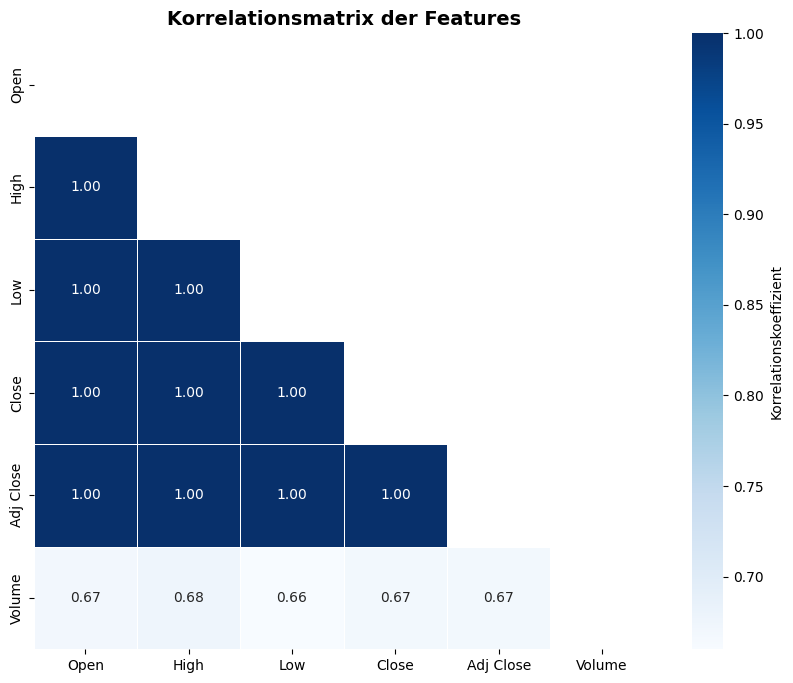

In [5]:
# Berechnen der Korrelationsmatrix
corr = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Blues', mask=mask, cbar_kws={'label': 'Korrelationskoeffizient'},
            linewidths=0.5, linecolor='white')
plt.title('Korrelationsmatrix der Features', fontsize=14, fontweight='bold')
plt.show()

In [6]:
data['RSI']=ta.rsi(data.Close, length=15)
data['EMA20']=ta.ema(data.Close, length=20)
data['EMA100']=ta.ema(data.Close, length=100)
data['EMA150']=ta.ema(data.Close, length=150)

data

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,EMA20,EMA100,EMA150
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,NaN,NaN
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,NaN,NaN,NaN
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,NaN,NaN,NaN
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,NaN,NaN,NaN
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3517,2024-05-04,62891.031250,64494.957031,62599.351563,63891.472656,63891.472656,20620477992,49.568973,63492.451518,60023.934751,55814.205645
3518,2024-05-05,63892.453125,64610.890625,62955.304688,64031.132813,64031.132813,18296164805,49.895138,63543.754499,60103.285208,55923.039118
3519,2024-05-06,64038.312500,65494.902344,62746.238281,63161.949219,63161.949219,28697928697,47.832307,63507.392091,60163.852812,56018.918722
3520,2024-05-07,63162.761719,64390.457031,62285.980469,62334.816406,62334.816406,25930730982,45.897570,63395.718216,60206.842190,56102.572996


In [7]:
import pandas as pd
import ta

# Simple Moving Average (SMA)
data['SMA50'] = ta.trend.SMAIndicator(close=data['Close'], window=50).sma_indicator()



In [8]:
# Momentum Indicator
data['Momentum'] = ta.momentum.ROCIndicator(close=data['Close'], window=10).roc()

In [9]:
# Rate of Change (ROC)
data['ROC'] = ta.momentum.ROCIndicator(close=data['Close'], window=12).roc()

In [10]:
# Bollinger Bands
bollinger = ta.volatility.BollingerBands(close=data['Close'], window=20, window_dev=2)
data['Bollinger_Middle'] = bollinger.bollinger_mavg()
data['Bollinger_Upper'] = bollinger.bollinger_hband()
data['Bollinger_Lower'] = bollinger.bollinger_lband()


In [11]:
# Moving Average Convergence Divergence (MACD)
macd = ta.trend.MACD(close=data['Close'], window_slow=26, window_fast=12, window_sign=9)
data['MACD'] = macd.macd()

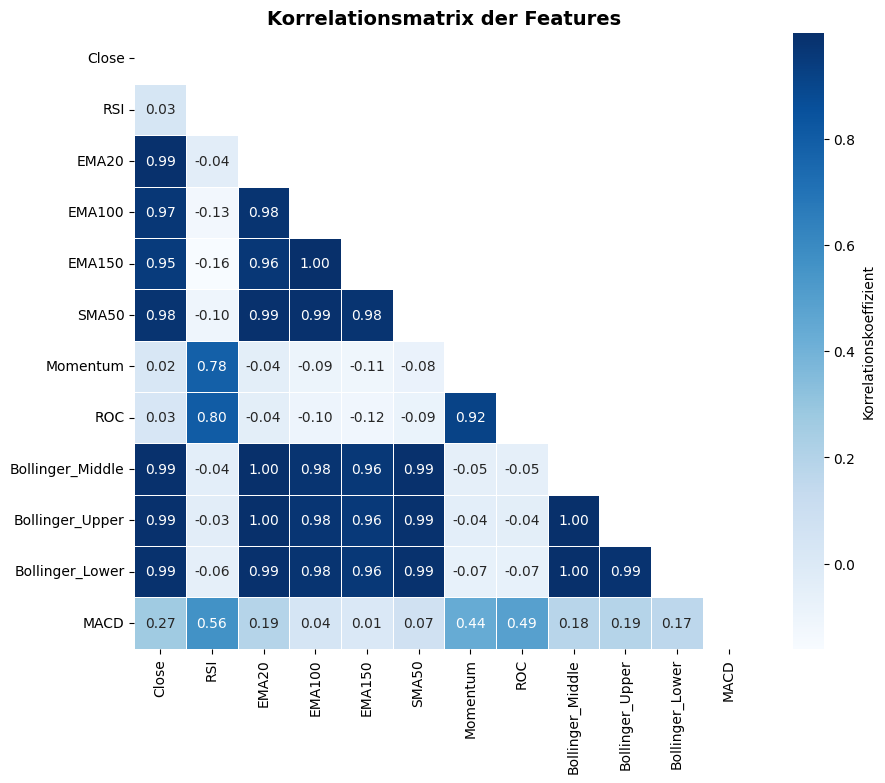

In [12]:
# Berechnen der Korrelationsmatrix
corr = data[['Close', 'RSI', 'EMA20', 'EMA100', 'EMA150', 'SMA50', 'Momentum', 'ROC', 'Bollinger_Middle', 'Bollinger_Upper', 'Bollinger_Lower', 'MACD']].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Blues', mask=mask, cbar_kws={'label': 'Korrelationskoeffizient'},
            linewidths=0.5, linecolor='white')
plt.title('Korrelationsmatrix der Features', fontsize=14, fontweight='bold')
plt.show()

Feature Auswahl für das Modell
Aufgrund der hohen Korrelation und der Multikollinearität macht es Sinn, redundante Features zu eliminieren und nur repräsentative Features zu behalten. Hier ist eine mögliche Auswahl:

EMA20 oder SMA50: Behalte nur eines dieser Features, da beide stark miteinander und mit dem Ziel korrelieren. Zum Beispiel: EMA20.
Bollinger_Middle: Da es stark korreliert ist und repräsentativ für die Bollinger-Bänder ist, könnte man Bollinger_Middle anstelle von Upper und Lower behalten.
MACD: Trotz der negativen Korrelation kann MACD hilfreich sein, da es eine andere Dimension der Preisbewegung darstellt.
RSI: Obwohl die Korrelation gering ist, bietet RSI ein anderes Signal, das das Modell möglicherweise ergänzt.

In [13]:
data.drop(['Date','High', 'Low', 'Adj Close', 'Volume','Open', 'EMA100', 'EMA150', 'SMA50', 'Momentum', 'ROC', 'Bollinger_Upper', 'Bollinger_Lower'], axis=1, inplace=True)

data['Previous_Close'] = data['Close'].shift(1)

data.dropna(inplace=True)


data.to_csv("data1.csv")

In [13]:
# Zielvariablen für die Vorhersage erstellen
data['Percent_Change_Next_Day'] = data['Close'].pct_change(1).shift(-1)
data['Percent_Change_Next_10_Days'] = data['Close'].pct_change(10).shift(-10)

In [14]:
data

,Close,RSI,EMA20,Bollinger_Middle,MACD,Previous_Close,Percent_Change_Next_Day,Percent_Change_Next_10_Days
25,378.549011,47.508687,377.022384,373.416200,-17.904763,362.299011,0.031343,0.012175
26,390.414001,51.782282,378.297776,371.147351,-14.446161,378.549011,0.026782,-0.081957
27,400.869995,55.224273,380.447511,370.030601,-10.737706,390.414001,-0.015209,-0.106082
28,394.773010,52.866528,381.811844,369.190552,-8.196223,400.869995,-0.030947,-0.120327
29,382.556000,48.427648,381.882716,368.097102,-7.086205,394.773010,0.003142,-0.072805
...,...,...,...,...,...,...,...,...
3517,63891.472656,49.568973,63492.451518,63336.007813,-1256.440247,62889.835938,0.002186,NaN
3518,64031.132813,49.895138,63543.754499,63366.253906,-1055.163014,63891.472656,-0.013574,NaN
3519,63161.949219,47.832307,63507.392091,63333.758203,-954.779110,64031.132813,-0.013095,NaN
3520,62334.816406,45.897570,63395.718216,63386.664453,-931.232184,63161.949219,-0.000199,NaN


In [15]:
data_clean = data
data_clean.dropna(inplace=True)
data_clean.reset_index(drop=True, inplace=True)


In [16]:
from sklearn.preprocessing import MinMaxScaler

# Auswahl und Skalierung der relevanten Features
selected_features = ['Close', 'RSI', 'EMA20', 'Bollinger_Middle', 'MACD', 'Previous_Close']
sc = MinMaxScaler(feature_range=(0, 1))
scaled_features = sc.fit_transform(data_clean[selected_features])

In [17]:
SEQ_LENGTH= 10 # Kann angepasst werden zum Optimieren

def create_sequences(features, target, seq_length):
    sequences = []
    labels = []
    for i in range(len(features) - seq_length):
        sequence = features[i:i + seq_length]  # Eine Sequenz von `seq_length` Tagen
        label = target[i + seq_length]  # Das Ziel für den Tag nach der Sequenz
        sequences.append(sequence)
        labels.append(label)
    return np.array(sequences), np.array(labels)

X, y = create_sequences(scaled_features, data['Percent_Change_Next_Day'].values, SEQ_LENGTH)


In [18]:
# Datenaufteilung: 70% Training, 20% Validierung, 10% Test
train_size = int(0.7 * len(X))
val_size = int(0.2 * len(X))
test_size = len(X) - train_size - val_size

X_train, X_val, X_test = X[:train_size], X[train_size:train_size + val_size], X[train_size + val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size + val_size], y[train_size + val_size:]

# Reshape für CNN-LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], X_val.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Bestätigen der Aufteilung
print(f'Train set shape: {X_train.shape}, {y_train.shape}')
print(f'Validation set shape: {X_val.shape}, {y_val.shape}')
print(f'Test set shape: {X_test.shape}, {y_test.shape}')


Train set shape: (2433, 10, 6), (2433,)
Validation set shape: (695, 10, 6), (695,)
Test set shape: (349, 10, 6), (349,)


In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Dense

In [20]:
# Modellarchitektur definieren
model = Sequential()

# 1D Convolutional Layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(SEQ_LENGTH, len(selected_features))))
model.add(MaxPooling1D(pool_size=2))

# LSTM Layer (ohne Flatten)
model.add(LSTM(units=50, activation='relu'))

# Dense Layer
model.add(Dense(units=1))

# Modell kompilieren
model.compile(optimizer='adam', loss='mean_squared_error')

# Modell Zusammenfassung anzeigen
#model.summary()

# Modell trainieren
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50


c:\WWI2021\Semester 6\Machine Learning Project\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 12/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015 - val_loss: 0.0011


In [21]:
# Modell bewerten
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 5.0222e-04
Test Loss: 0.0006160494522191584


In [22]:
# Vorhersagen treffen
predictions = model.predict(X_test)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [23]:
# Vorhersagen mit dem Testdatensatz
y_pred = model.predict(X_test)

# Ausgabe der ersten 10 Vorhersageergebnisse und deren tatsächlichen Werten
for i in range(10):
    print(f"Predicted: {y_pred[i][0]:.4f}, Actual: {y_test[i]}")


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step
Predicted: 0.0064, Actual: 0.01339486725473038
Predicted: 0.0063, Actual: -0.020679507623042825
Predicted: 0.0064, Actual: 0.0021585968577741976
Predicted: 0.0065, Actual: 0.008905016143175404
Predicted: 0.0065, Actual: -0.013850552929880022
Predicted: 0.0065, Actual: 0.003642513462317032
Predicted: 0.0065, Actual: 0.013945303763497563
Predicted: 0.0065, Actual: -0.032723027682601935
Predicted: 0.0065, Actual: 0.0053688873062487374
Predicted: 0.0066, Actual: 0.009181223908522052


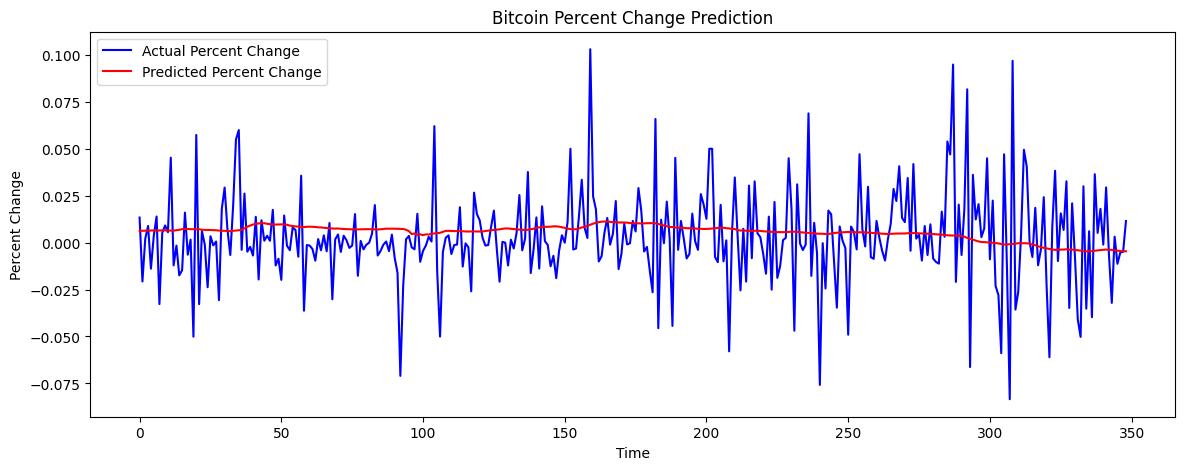

In [24]:
import matplotlib.pyplot as plt

# Rücktransformation der Skalierung der Labels ist hier nicht notwendig, da wir die prozentuale Veränderung vorhersagen
# y_test sind die tatsächlichen prozentualen Änderungen
# predictions sind die vorhergesagten prozentualen Änderungen

# Ergebnisse visualisieren
plt.figure(figsize=(14, 5))
plt.plot(y_test, color='blue', label='Actual Percent Change')
plt.plot(predictions, color='red', label='Predicted Percent Change')
plt.title('Bitcoin Percent Change Prediction')
plt.xlabel('Time')
plt.ylabel('Percent Change')
plt.legend()
plt.show()


Optimierungsmöglichkeiten für wenn Lifecycle Management Tool eingeführt ist:

Wenn Sie die Preisbewegung (zum Beispiel die Richtung der Preisänderung oder die prozentuale Änderung) anstelle des tatsächlichen Preises vorhersagen und feststellen, dass die Leistung des Modells nicht zufriedenstellend ist, gibt es mehrere Ansätze, um die Vorhersagequalität zu verbessern. Hier sind einige Strategien, die Sie in Betracht ziehen können:


### 2. **Modellarchitektur anpassen**
- **Anzahl der LSTM-Einheiten ändern**: Erhöhen oder verringern Sie die Anzahl der Neuronen in den LSTM-Schichten, um zu sehen, ob dies die Modellleistung beeinflusst.
- **Tiefe des Netzwerks**: Fügen Sie mehrere LSTM-Schichten hinzu, um ein tieferes Netzwerk zu erstellen, das möglicherweise komplexere Muster erfassen kann.
- **Dropout hinzufügen**: Um Overfitting zu vermeiden, fügen Sie Dropout-Schichten hinzu, die helfen können, die Generalisierbarkeit des Modells zu verbessern.

### 3. **Hyperparameter optimieren**
- **Lernrate anpassen**: Experimentieren Sie mit unterschiedlichen Lernraten und anderen Optimierungsparametern.
- **Batch-Größe und Epochenzahl**: Das Ändern der Batch-Größe und der Anzahl der Epochen kann erhebliche Auswirkungen auf das Trainingsergebnis haben.
- **Regularisierung anwenden**: Experimentieren Sie mit verschiedenen Arten von Regularisierungen (L1, L2), um das Overfitting zu kontrollieren.

### 4. **Verlustfunktion anpassen**
- **Andere Verlustfunktionen ausprobieren**: Wenn Sie die Richtung der Preisbewegung vorhersagen, könnte eine binäre Kreuzentropie (wenn es sich um eine Klassifikationsaufgabe handelt) oder eine benutzerdefinierte Verlustfunktion, die speziell für Ihr Vorhersageziel entwickelt wurde, nützlich sein.

### 5. **Trainingstechniken überprüfen**
- **Frühzeitiges Beenden**: Verwenden Sie Early Stopping, um das Training zu beenden, wenn sich die Validierungsleistung nicht mehr verbessert.
- **Daten-Shuffling und -Partitionierung**: Stellen Sie sicher, dass Ihre Trainings-, Validierungs- und Testdatensätze richtig partitioniert und während des Trainings effektiv gemischt werden.

### 6. **Evaluation und Benchmarking**
- **Cross-Validation verwenden**: Statt einer einfachen Train-Test-Split kann Cross-Validation eine robustere Evaluation der Modellleistung bieten.
- **Leistungsmetriken**: Überprüfen Sie, ob Sie die richtigen Metriken für die Bewertung des Modells verwenden. Für Klassifikationsaufgaben sind Genauigkeit, F1-Score, ROC-AUC usw. relevant.

Diese Ansätze bieten verschiedene Wege, die Modellleistung zu verbessern und sollten je nach spezifischem Szenario und den Ergebnissen der initialen Modellbewertungen angepasst werden.